In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#Setting the aesthetic style of the plots
sns.set_style("darkgrid")

In [3]:
#reading csv file
dataRed = pd.read_csv('winequality-red.csv')

In [4]:
print(dataRed.keys()) #display column names

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
#states the no. of rows and columns
print(dataRed.shape)

(1599, 12)


In [18]:
dataRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
wineQuality             1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [19]:
dataRed.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
dataRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,passable
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,passable
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,passable
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,passable
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,passable


In [21]:
#Dictionaries
wineDict = {3:"bad",4:"bad",5:"passable",6:"passable",7:"good",8:"good"}

In [22]:
#creating new column 'wineQuality' using dictionary values
dataRed["wineQuality"] = dataRed.quality.map(wineDict)

In [23]:
dataRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wineQuality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,passable
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,passable
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,passable
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,passable
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,passable


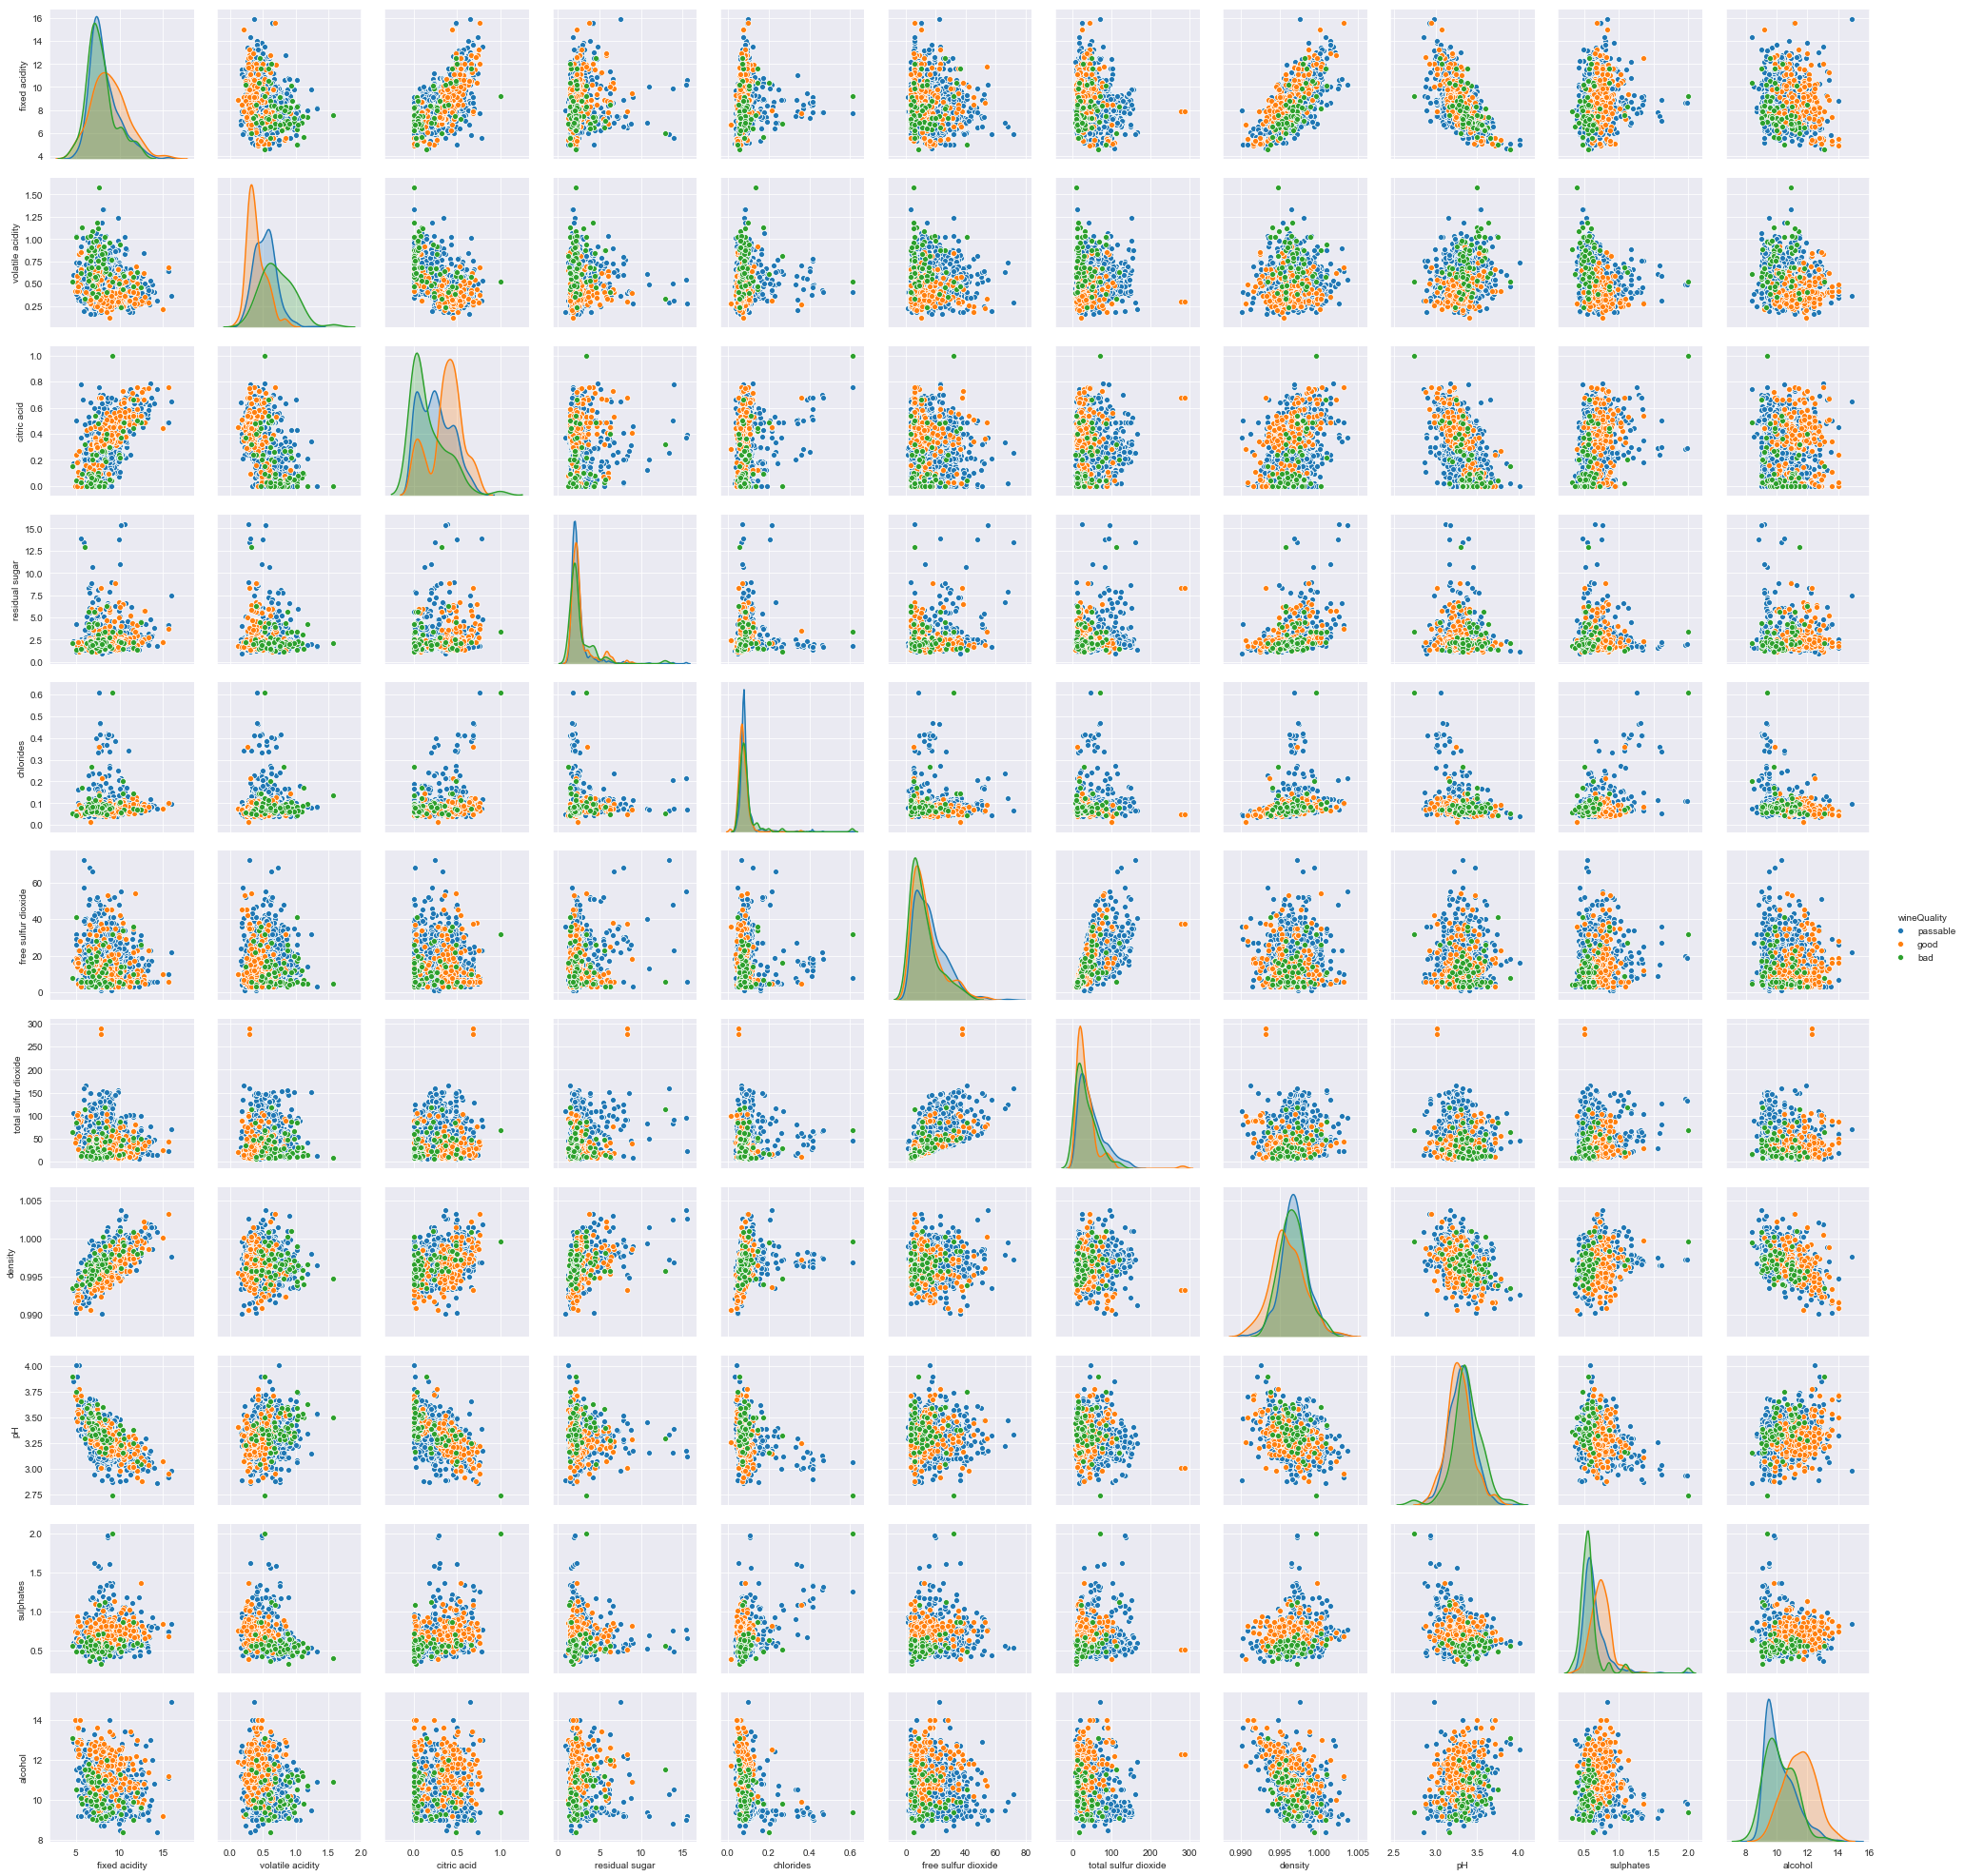

In [22]:
sns.pairplot(dataRed,hue="wineQuality")
#creates a grid such that: each row has the same y-axis
#each column has the same x-axis
#The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column.

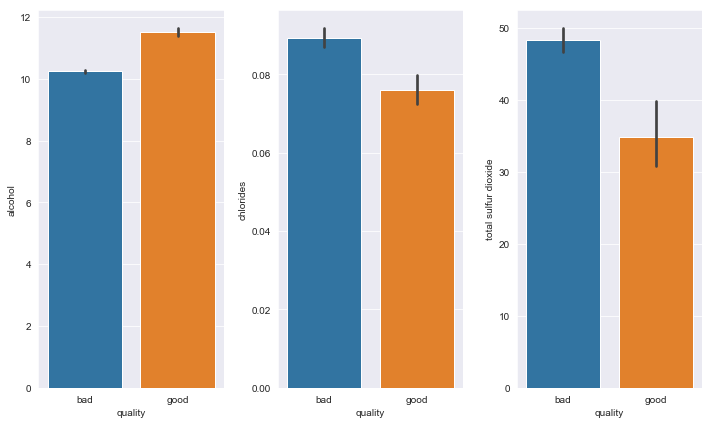

In [23]:
plt.figure(figsize = (10,6))
plt.subplot(1,3,1) #subplot has 1 row and 3 columns
sns.barplot(x = 'quality', y = 'alcohol', data = dataRed)


plt.subplot(1,3,2)
sns.barplot(x = 'quality', y = 'chlorides', data = dataRed)

plt.subplot(1,3,3)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = dataRed)
plt.tight_layout() #adjusts subplot params so that the subplot fits in to the figure area. 

In [24]:
dataRed['quality'].value_counts() #prints no. of wines in each q

bad     1382
good     217
Name: quality, dtype: int64

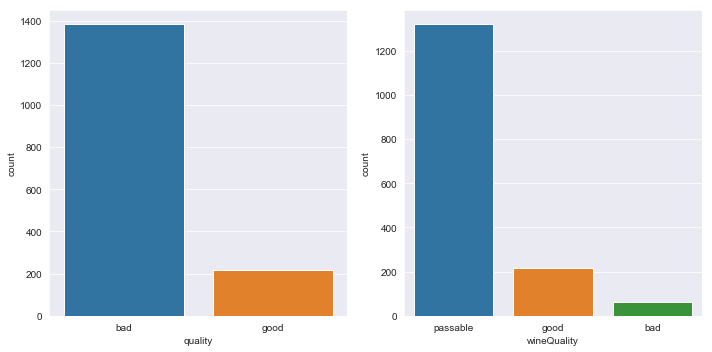

In [25]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=dataRed,x="quality")

plt.subplot(1,2,2)
sns.countplot(data=dataRed,x="wineQuality")
plt.tight_layout()

In [ ]:
bins = (2,6.5,8) #divides data into categories
group_names = ['bad','good']
categories = pd.cut(dataRed['quality'], bins, labels = group_names) #sort data values into bins
dataRed['quality'] = categories #assign new data categories to quality

In [24]:
dataRed['quality'].value_counts()  #prints no. of good and bad quality wine(passable is included under bad)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [25]:
dataRed.corr() #correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


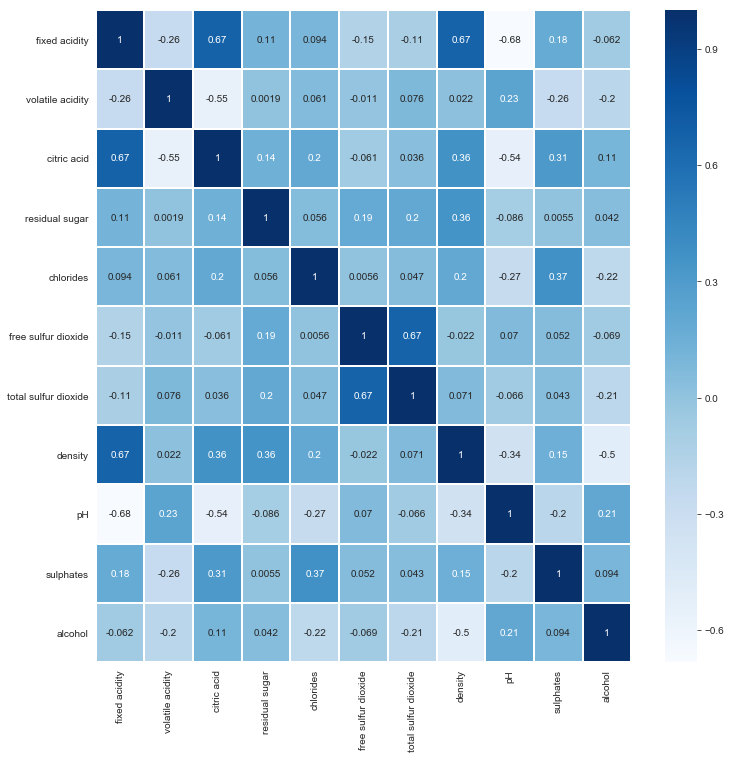

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(data=dataRed.corr(),annot=True,cmap="Blues",linewidths=1)

# LOGISTIC REGRESSION

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #for standardising values

In [27]:
scaler.fit(dataRed.drop(["quality","wineQuality"],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_features = scaler.transform(dataRed.drop(["quality","wineQuality"],axis=1))

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=dataRed.columns[:-2])
df_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [31]:
X = scaled_features
y = dataRed["wineQuality"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [33]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

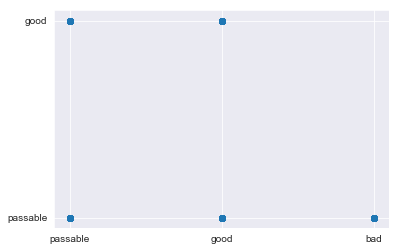

In [34]:
y_pred=logmodel.predict(X_test)
plt.scatter(y_test, y_pred)

In [35]:
logmodel.score(X_train, y_train)
#best score is 1

0.8428459734167318

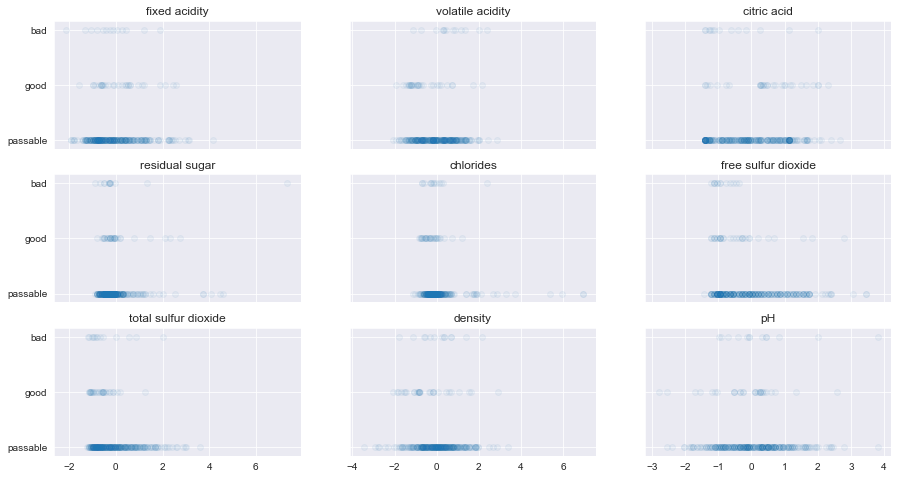

In [46]:
f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize = [15,8])

axarr[0, 0].scatter(X_test[:,0], y_test, alpha = 0.05)
axarr[0, 0].set_title('fixed acidity')

axarr[0, 1].scatter(X_test[:,1], y_test, alpha = 0.05)
axarr[0, 1].set_title('volatile acidity')
axarr[0, 2].scatter(X_test[:,2], y_test, alpha = 0.05)
axarr[0, 2].set_title('citric acid')

axarr[1, 0].scatter(X_test[:,3], y_test, alpha = 0.05)
axarr[1, 0].set_title('residual sugar')
axarr[1, 1].scatter(X_test[:,4], y_test, alpha = 0.05)
axarr[1, 1].set_title('chlorides')
axarr[1, 2].scatter(X_test[:,5], y_test, alpha = 0.05)
axarr[1, 2].set_title('free sulfur dioxide')

axarr[2, 0].scatter(X_test[:,6], y_test, alpha = 0.05)
axarr[2, 0].set_title('total sulfur dioxide')
axarr[2, 1].scatter(X_test[:,7], y_test, alpha = 0.05)
axarr[2, 1].set_title('density')
axarr[2, 2].scatter(X_test[:,8], y_test, alpha = 0.05)
axarr[2, 2].set_title('pH')


plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


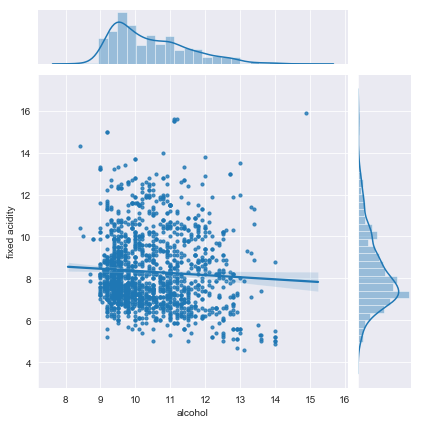

In [47]:
fixedAcidity_citricAcid = dataRed[['fixed acidity', 'alcohol']]
g = sns.JointGrid(x="alcohol", y="fixed acidity", data=fixedAcidity_citricAcid, size=6)
g = g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g = g.plot_marginals(sns.distplot)

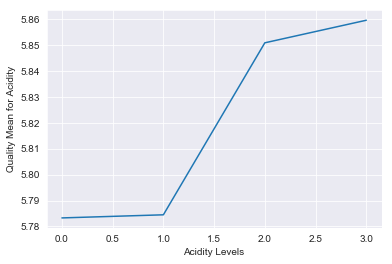

In [48]:
import matplotlib.pyplot as plt
plt.plot([5.7833,5.7845, 5.8508, 5.8595]) #mean acidity levels
plt.ylabel('Quality Mean for Acidity')
plt.xlabel('Acidity Levels')
plt.show();

In [36]:
predictions = logmodel.predict(X_test)

In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        13
        good       0.45      0.33      0.38        30
    passable       0.89      0.96      0.92       277

   micro avg       0.86      0.86      0.86       320
   macro avg       0.45      0.43      0.44       320
weighted avg       0.81      0.86      0.83       320



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
print(confusion_matrix(y_test,predictions))

[[  0   0  13]
 [  0  10  20]
 [  0  12 265]]


# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)

In [45]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [46]:
knn_pred = knn.predict(X_test)

In [47]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

         bad       0.20      0.08      0.11        13
        good       0.51      0.77      0.61        30
    passable       0.93      0.91      0.92       277

   micro avg       0.86      0.86      0.86       320
   macro avg       0.55      0.58      0.55       320
weighted avg       0.86      0.86      0.86       320



In [48]:
print(confusion_matrix(y_test,knn_pred))

[[  1   1  11]
 [  0  23   7]
 [  4  21 252]]


# SVM

In [58]:
from sklearn.svm import SVC

In [59]:
svc_model = SVC()

In [60]:
svc_model.fit(X_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [61]:
svc_pred = svc_model.predict(X_test)

In [62]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        13
        good       0.64      0.30      0.41        30
    passable       0.89      0.98      0.93       277

   micro avg       0.88      0.88      0.88       320
   macro avg       0.51      0.43      0.45       320
weighted avg       0.83      0.88      0.85       320



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
print(confusion_matrix(y_test,svc_pred))

[[  0   0  13]
 [  0   9  21]
 [  0   5 272]]
